In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
sns.set_style('whitegrid')

In [74]:
titanic = sns.load_dataset('titanic')

In [75]:
titanic.to_csv('./titanic.csv', index=False)

In [76]:
df = pd.read_csv('./titanic.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [78]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Survived: Survival status (0 = No, 1 = Yes).

Pclass: Passenger class (1st, 2nd, 3rd).

Sex: Gender of the passenger (male or female).

Age: Age of the passenger.

SibSp: Number of siblings or spouses aboard.

Parch: Number of parents or children aboard.

Fare: Fare paid for the ticket.

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [79]:
missing_df = df.isna().sum().sort_values(ascending=False).reset_index()
missing_df.columns = ['feature', 'missing']
missing_df[missing_df['missing'] > 0]

,feature,missing
0,deck,688
1,age,177
2,embarked,2
3,embark_town,2


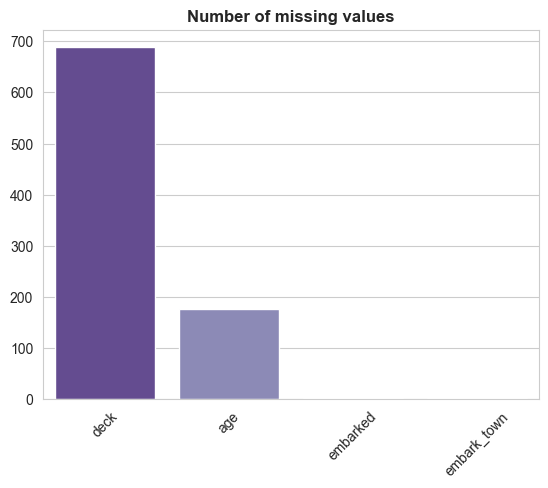

In [80]:
sns.barplot(data=missing_df[missing_df['missing'] > 0],
            x='feature',
            y='missing',
            palette='Purples_r',
            hue='feature')

plt.title('Number of missing values', fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

In [81]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [82]:
redundant_cols = ['alone', 'who', 'adult_male', 'alive', 'pclass', 'deck', 'embarked']

In [83]:
df = df.drop(redundant_cols, axis=1)

In [84]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town
0,0,male,22.0,1,0,7.2500,Third,Southampton
1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,Southampton
3,1,female,35.0,1,0,53.1000,First,Southampton
4,0,male,35.0,0,0,8.0500,Third,Southampton


In [85]:
df.describe()

,survived,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


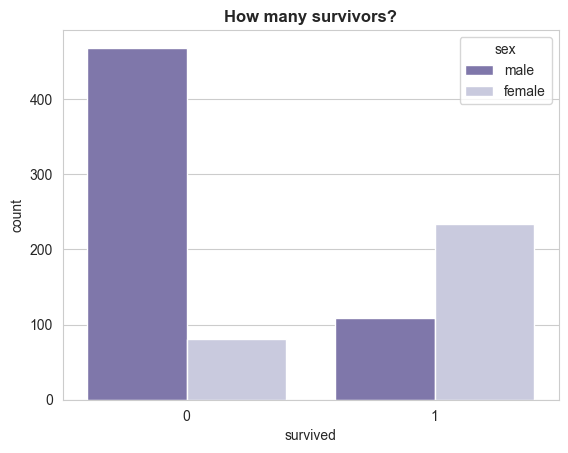

In [86]:
sns.countplot(data=df, x='survived',hue='sex', palette='Purples_r')
plt.title('How many survivors?', fontweight='bold')
plt.show()

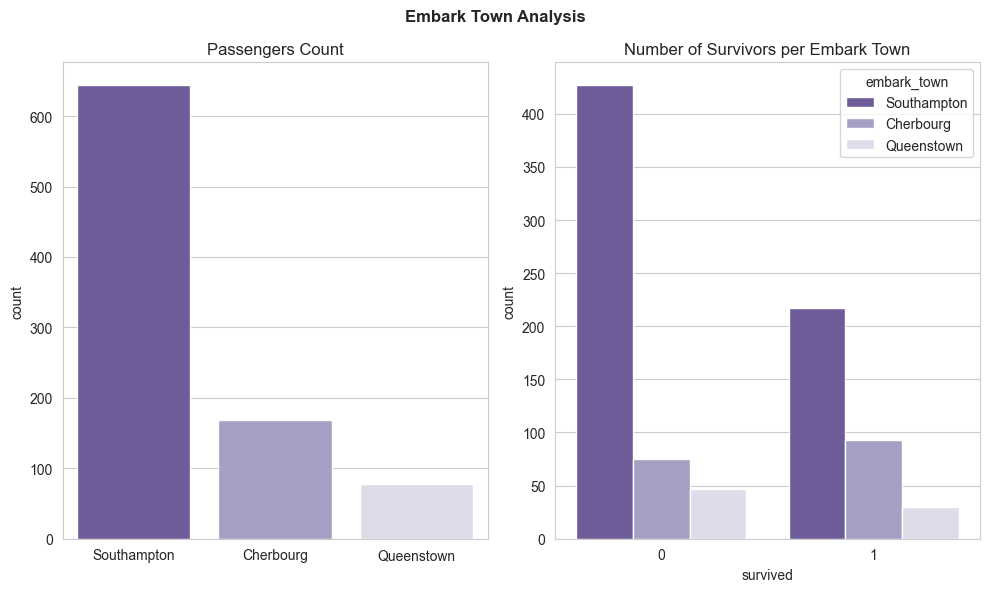

In [87]:
hue_order = df['embark_town'].dropna().unique()

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Embark Town Analysis', fontweight='bold')

sns.countplot(ax=axes[0],
              data=df,
              x='embark_town',
              hue='embark_town', 
              palette='Purples_r',
              hue_order=hue_order)

axes[0].set_title('Passengers Count')
axes[0].set_xlabel('')
axes[0].legend_.remove()

sns.countplot(ax=axes[1],
              data=df,
              x='survived',
              hue='embark_town', 
              palette='Purples_r',
              hue_order=hue_order)
axes[1].set_title('Number of Survivors per Embark Town')

plt.tight_layout()
plt.show()

In [88]:
missing_df[missing_df['missing'] > 0]

,feature,missing
0,deck,688
1,age,177
2,embarked,2
3,embark_town,2


In [89]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town
0,0,male,22.0,1,0,7.2500,Third,Southampton
1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,Southampton
3,1,female,35.0,1,0,53.1000,First,Southampton
4,0,male,35.0,0,0,8.0500,Third,Southampton


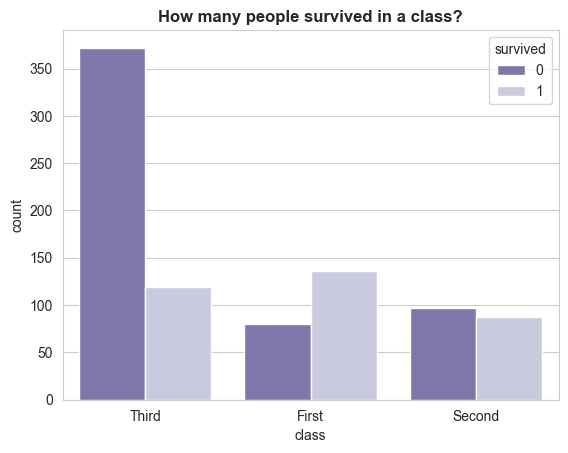

In [90]:
sns.countplot(data=df, x='class', hue='survived', palette='Purples_r')
plt.title('How many people survived in a class?', fontweight='bold')
plt.show()

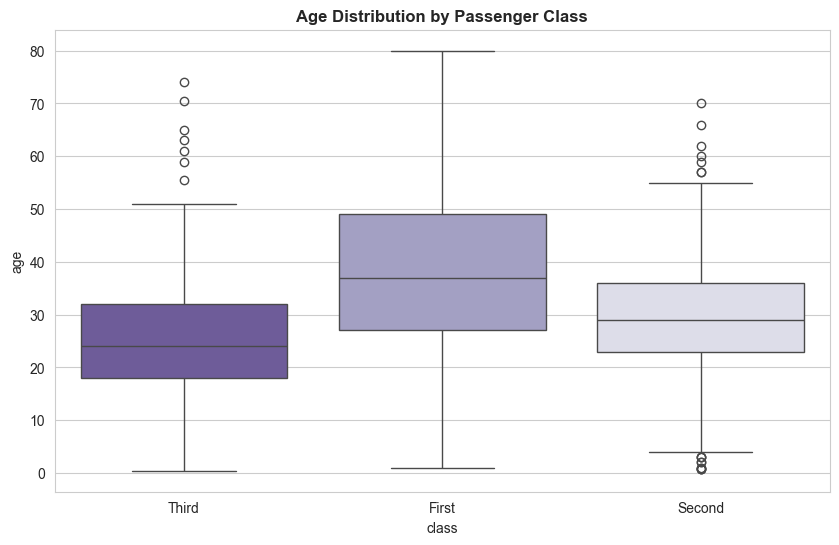

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='class', y='age', hue='class', palette='Purples_r')
plt.title('Age Distribution by Passenger Class', fontweight='bold')
plt.show()

In [92]:
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'embark_town'],
      dtype='object')

In [93]:
df['sibsp'].value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [94]:
df['parch'].value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [95]:
df.groupby('class')['age'].median()

class
First     37.0
Second    29.0
Third     24.0
Name: age, dtype: float64

In [96]:
df.isna().sum().sort_values(ascending=False)

age            177
embark_town      2
sex              0
survived         0
sibsp            0
parch            0
fare             0
class            0
dtype: int64

In [97]:
df[['age', 'class']]

,age,class
0,22.0,Third
1,38.0,First
2,26.0,Third
3,35.0,First
4,35.0,Third
...,...,...
886,27.0,Second
887,19.0,First
888,NaN,Third
889,26.0,First


In [98]:
df['age'] = df['age'].fillna(df.groupby('class')['age'].transform('median'))

In [99]:
df[['age', 'class']]

,age,class
0,22.0,Third
1,38.0,First
2,26.0,Third
3,35.0,First
4,35.0,Third
...,...,...
886,27.0,Second
887,19.0,First
888,24.0,Third
889,26.0,First


In [100]:
df.isna().sum().sort_values(ascending=False)

embark_town    2
survived       0
age            0
sex            0
sibsp          0
parch          0
fare           0
class          0
dtype: int64

In [101]:
df[df['embark_town'].isna()]

,survived,sex,age,sibsp,parch,fare,class,embark_town
61,1,female,38.0,0,0,80.0,First,NaN
829,1,female,62.0,0,0,80.0,First,NaN


In [102]:
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

embark_town    0.224467
survived       0.000000
age            0.000000
sex            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
dtype: float64

In [103]:
df = df.dropna()

In [104]:
df.to_csv('./titanic_clean.csv', index=False)